In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('航空公司航班数据.xlsx')

## 数据预处理

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
## 把Date_of_Journey拆开成Day和Month特征
df['Journey_Day']=df['Date_of_Journey'].apply(lambda x: x.split('/')[0])
df['Journey_month']=df['Date_of_Journey'].apply(lambda x: x.split('/')[1])
df.drop('Date_of_Journey',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03


In [6]:
# 查看缺失情况
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Journey_Day        0
Journey_month      0
dtype: int64

In [8]:
# 缺失情况较少，可以直接丢掉数据
df.dropna(inplace=True)
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_Day        0
Journey_month      0
dtype: int64

In [9]:
## Dep_Time拆开成Hour和Minute
df['Dep_Hour']=df['Dep_Time'].apply(lambda x: x.split(':')[0])
df['Dep_Min']=df['Dep_Time'].apply(lambda x: x.split(':')[1])
df.drop('Dep_Time',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,05,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,06,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,05,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,01,03,16,50


In [10]:
## Arrival_Time拆分Hour和Minute
df['Arrival_Hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop('Arrival_Time',axis=1,inplace=True)

In [11]:
duration=list(df['Duration'])

In [13]:
duration[:5]

['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m']

In [14]:
## 处理Duration（有些有minute有些没有）添加上h和m
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip() + " 0m "
        else:
            duration[i]=' 0h ' + duration[i]      

In [15]:
duration[:5]

['2h 50m', '7h 25m', '19h 0m ', '5h 25m', '4h 45m']

In [16]:
## 处理之后继续拆分时间
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))
df['Duration_hours']=duration_hours
df['Duration_mins']=duration_mins
df.drop('Duration',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,03,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,05,05,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,06,09,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,05,18,05,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,01,03,16,50,21,35,4,45


### 数据处理-类别特征
- 一般都是把它作为哑变量。也就是onehot。

In [17]:
# 列出Airline
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [18]:
# 生成Airline哑变量
Airline=df[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)

In [19]:
Airline

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [20]:
# 同理处理Source
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [21]:
Source=df[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [22]:
# 同理处理Destination
Destination=df[['Destination']]
Destination=pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [23]:
# Route 和Info这两个特征可以剔除。信息较少
df.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [24]:
df_final=pd.concat([df,Airline,Source,Destination],axis=1)
df_final.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,03,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2 stops,7662,1,05,05,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,06,09,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,05,18,05,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1 stop,13302,01,03,16,50,21,...,0,0,0,0,0,0,0,0,0,1


###  处理Total_Stops

In [25]:
df_final['Total_Stops'].value_counts()


1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [27]:
df_final.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4},inplace=True)
df_final.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,03,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,05,05,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,06,09,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,05,18,05,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,01,03,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [28]:
df_final.drop(['Airline','Source','Destination'],axis=1,inplace=True)
df_final.head()

,Total_Stops,Price,Journey_Day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,03,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,05,05,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,06,09,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,05,18,05,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,01,03,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


## EDA

In [30]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Total_Stops                                10682 non-null  int64 
 1   Price                                      10682 non-null  int64 
 2   Journey_Day                                10682 non-null  object
 3   Journey_month                              10682 non-null  object
 4   Dep_Hour                                   10682 non-null  object
 5   Dep_Min                                    10682 non-null  object
 6   Arrival_Hour                               10682 non-null  int64 
 7   Arrival_min                                10682 non-null  int64 
 8   Duration_hours                             10682 non-null  int64 
 9   Duration_mins                              10682 non-null  int64 
 10  Airline_Air India                 

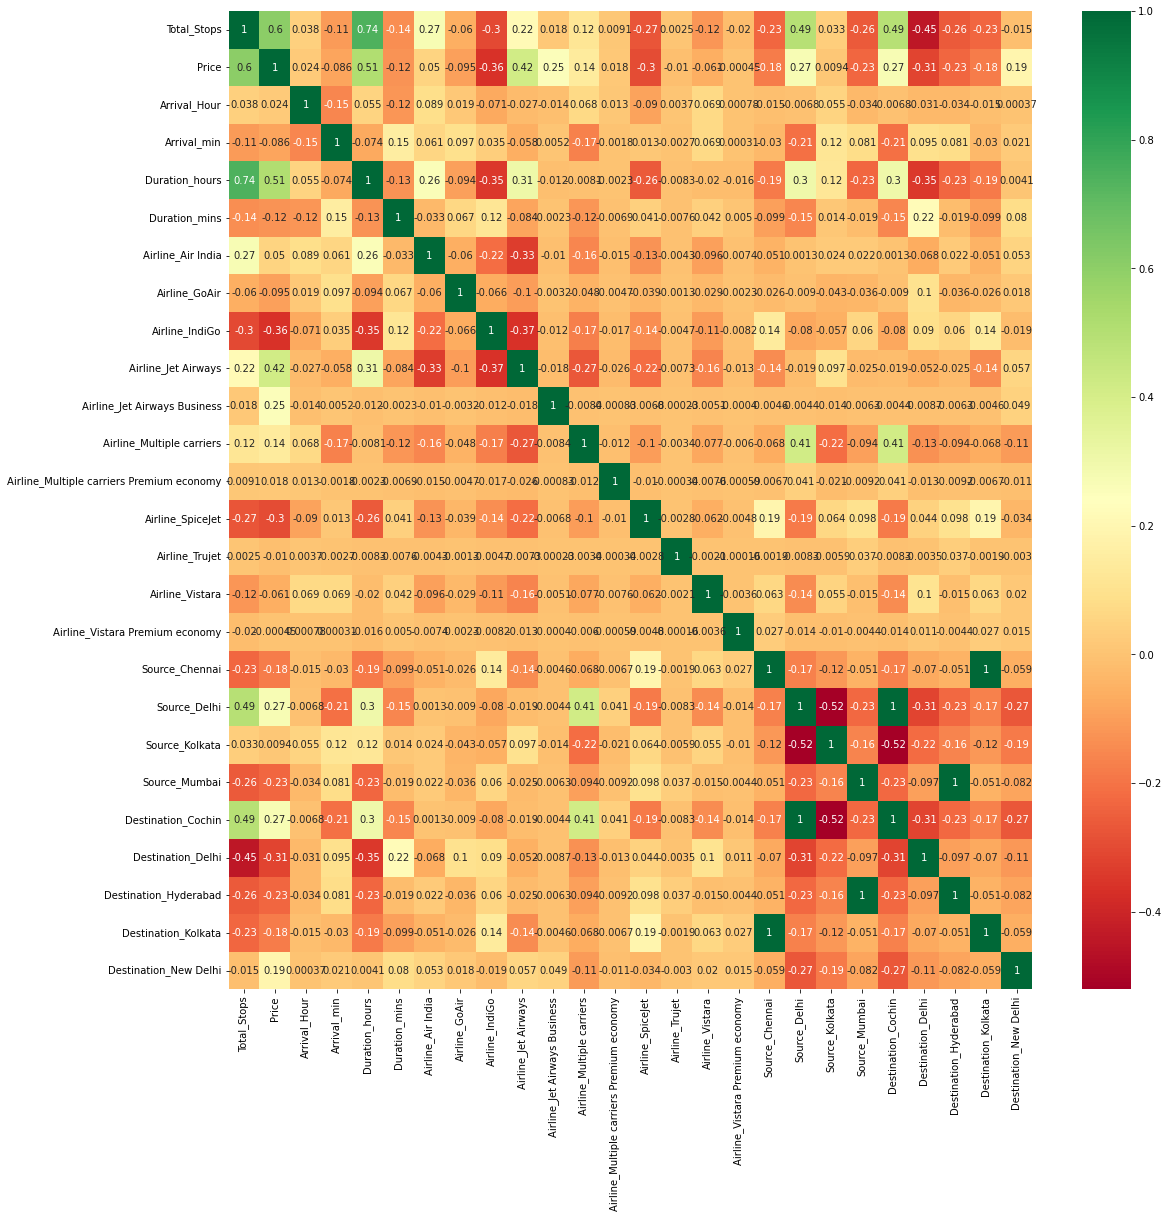

In [32]:
## 热力图查看相关性
plt.figure(figsize=(18,18))
sns.heatmap(df_final.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [48]:
# 绘制特征的直方图
def plot_feature_hist(df):
    feature_names = list(df.dtypes[df.dtypes == 'uint8'].index) + list(df.dtypes[df.dtypes == 'int64'].index) + list(df.dtypes[df.dtypes == 'float64'].index)
    rows, cols = len(feature_names)//3+1, 3
    plt.rcParams['figure.figsize'] = (24, 6*rows)
    df[feature_names].hist(layout=(rows, cols), bins=31)

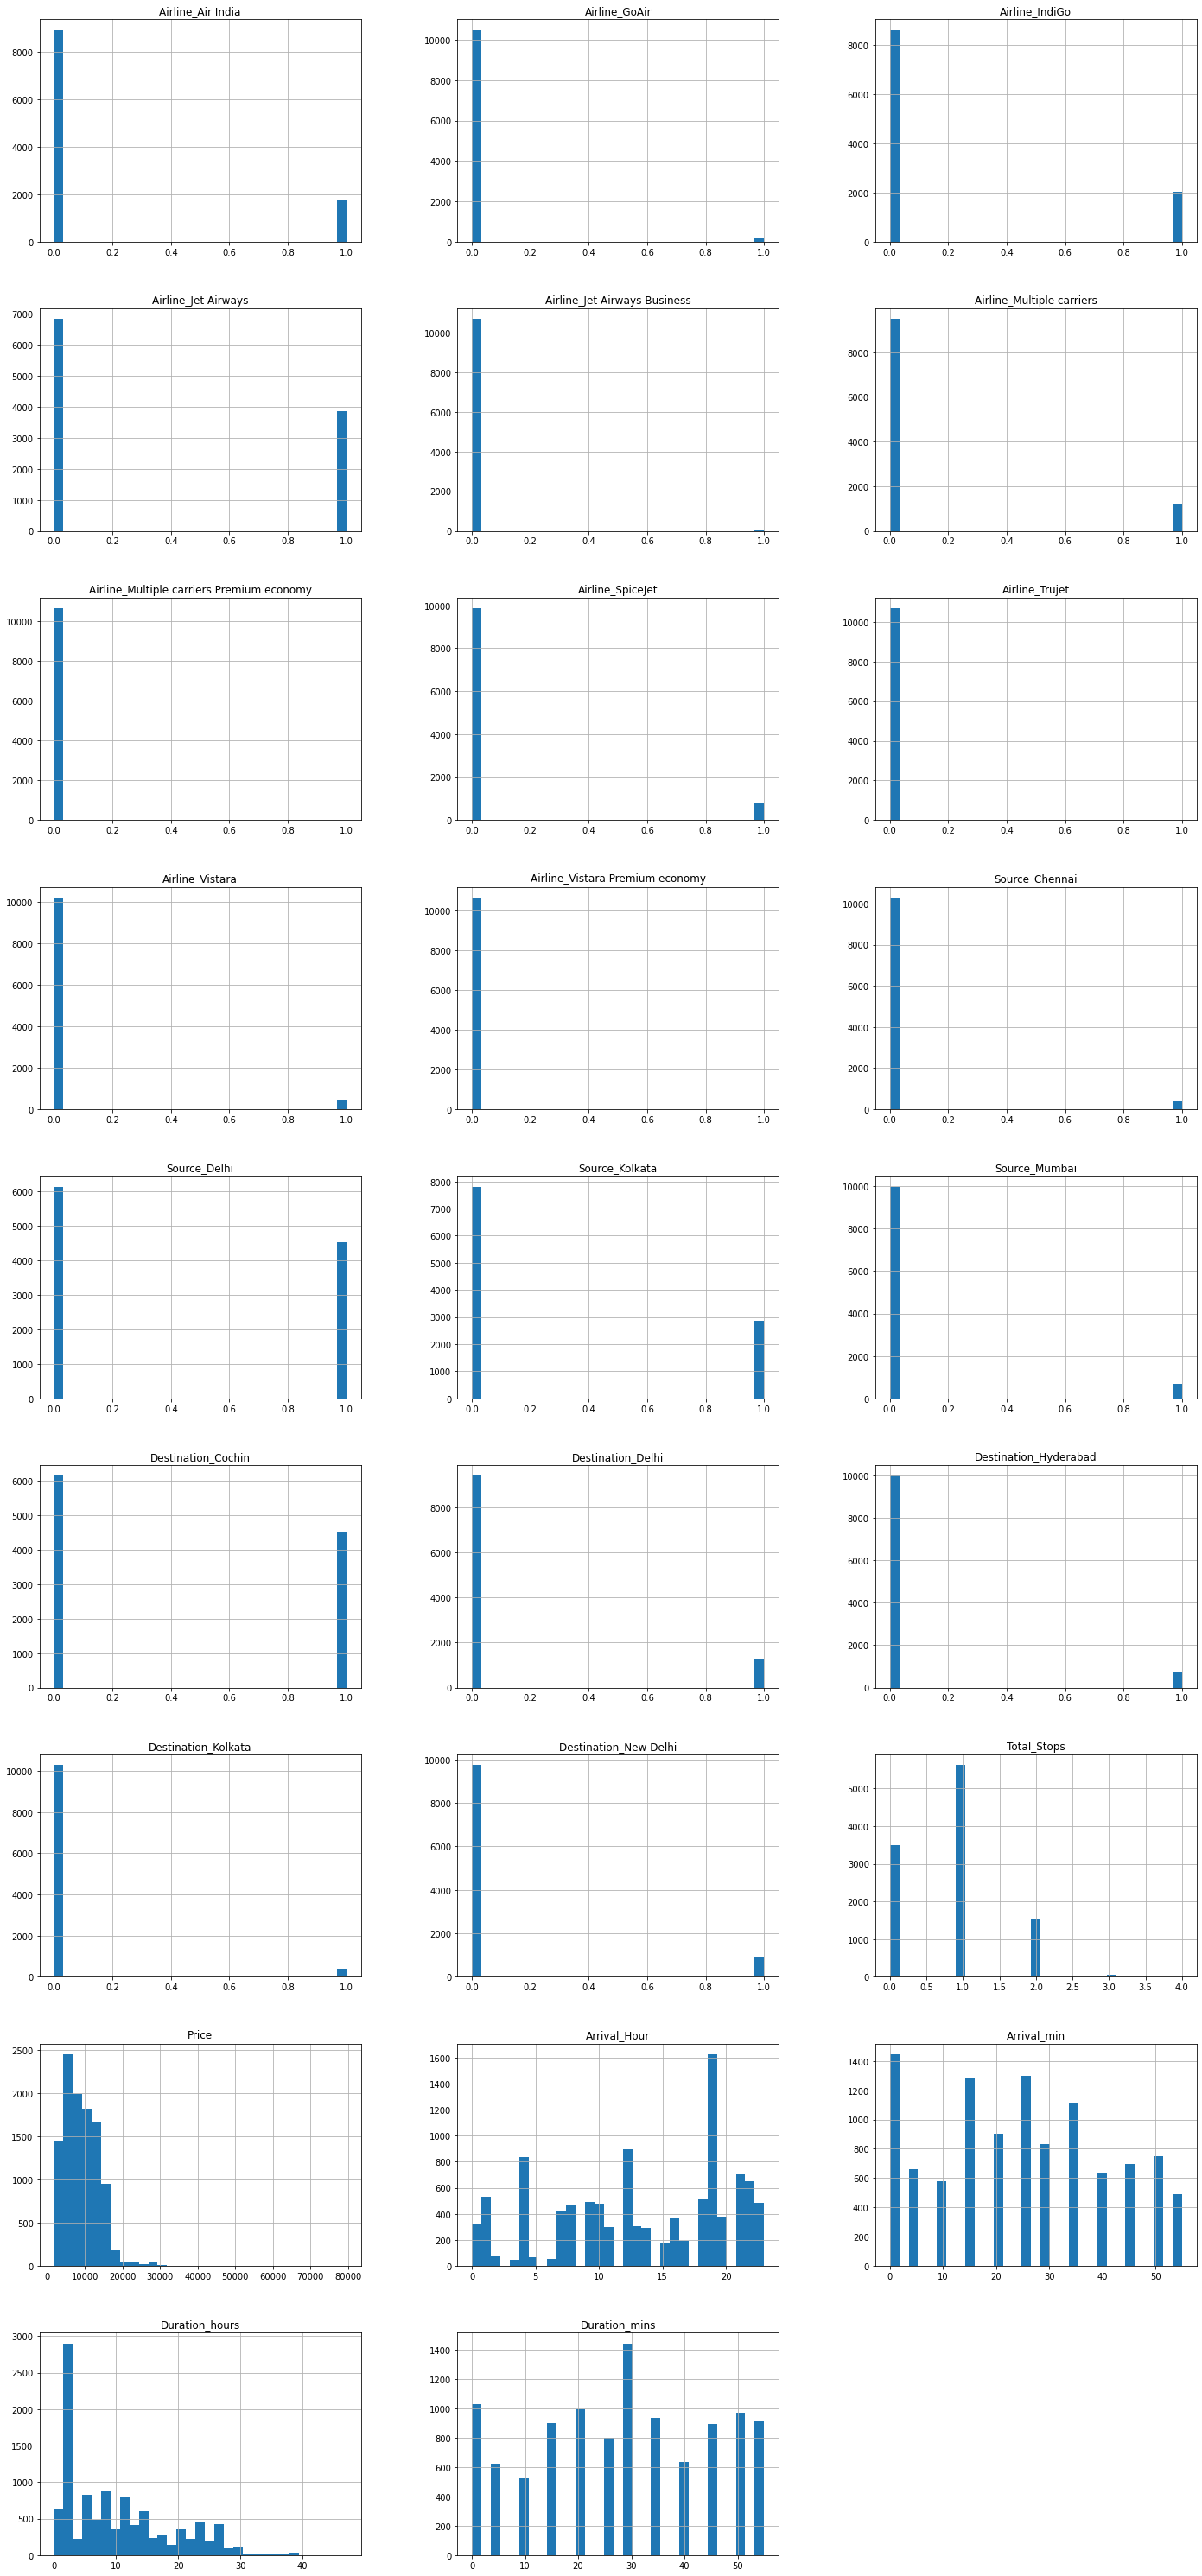

In [49]:
plot_feature_hist(df_final)

In [50]:
# 绘制两个特征的线性关系
def plot_reg(df, f1_name, f2_name):
    plt.figure(figsize=(16,9))
    sns.regplot(data=df, x=f1_name, y=f2_name)
    plt.title(f1_name+' vs '+f2_name, fontsize=14)
    plt.show()

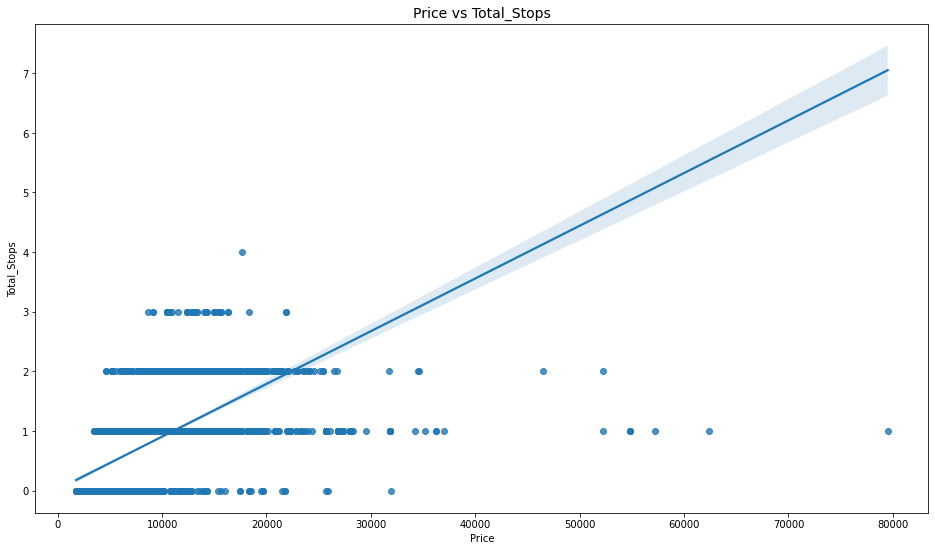

In [51]:
# 查看Price和Total_Stops的线性关系
plot_reg(df_final, 'Price', 'Total_Stops')

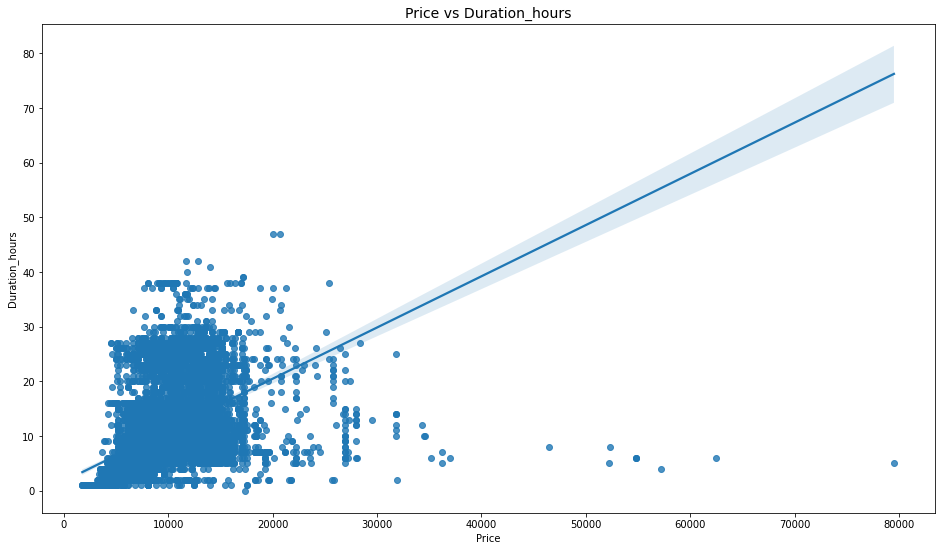

In [52]:
# 查看Price和Duration_hours的线性关系

plot_reg(df_final, 'Price', 'Duration_hours')

## 建立模型-进行预测

In [53]:
# 划分数据和标签
X=df_final.drop('Price',axis=1)
y=df_final['Price']

In [54]:
from sklearn.model_selection import train_test_split
# 划分训练集和测试集
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
# 使用随机森林回归模型
from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor()
reg_rf.fit(X_train,y_train)
y_pred=reg_rf.predict(X_test)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


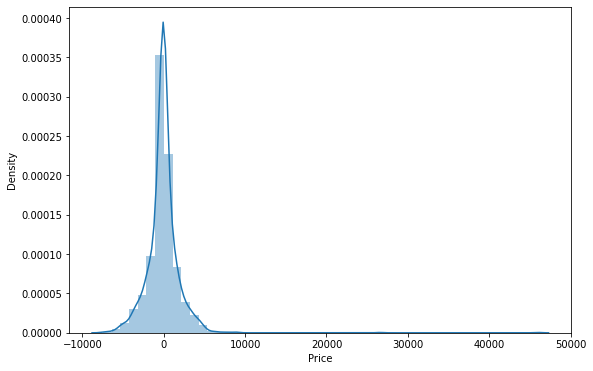

In [61]:
# 查看残差
fig = plt.figure(figsize=(9,6))
sns.distplot(y_test-y_pred)
plt.show()

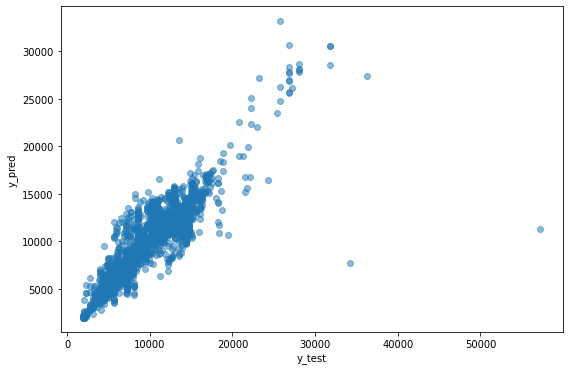

In [62]:
# 查看预测和现实的分布
fig = plt.figure(figsize=(9,6))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [64]:
from sklearn import metrics
# 查看更多的评价指标 (MAE\MSE\RMSE\R2)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2:", metrics.r2_score(y_test, y_pred)) 

MAE: 1185.7780390196165
MSE: 4376134.518291066
RMSE: 2091.921250499422
R2: 0.7970446578702559
